In [71]:
import re
import numpy as np
import math
def datetime_calculator(Date1,Date2):
    
    #"H:M:S - H:M:S"
    #Because the data has no minus sign like "-H:M;S", so we can do this.
    #But the calcluation will produce "-H:M:S" if Date1 < Date2
    #So normally there is no mistake.
    pattern1 = r"[0-9][0-9]:[0-9][0-9]:[0-9][0-9]"
    if re.match(pattern1, Date1) is not None and re.match(pattern1, Date2) is not None:
        d1_seconds = int(Date1[0:2]) * 3600 + int(Date1[3:5]) * 60 + int(Date1[6:8])
        d2_seconds = int(Date2[0:2]) * 3600 + int(Date2[3:5]) * 60 + int(Date2[6:8])
        interval = d1_seconds - d2_seconds
        sign = np.sign(interval)
        
        hour = str(abs(interval) //3600)
        minutes = str(abs(interval) %3600 // 60)
        seconds = str(abs(interval) - abs(int(hour)) * 3600 - abs(int(minutes)) * 60)
        
        
        if re.match(r"^[0-9]$",hour) is not None:
            hour = "0"+hour
        
        if sign == -1:
            hour = "-"+hour
            
        if re.match(r"^[0-9]$",minutes) is not None:
            minutes = "0"+minutes
        if re.match(r"^[0-9]$",seconds) is not None:
            seconds = "0"+seconds
            
            
        return hour + ":" + minutes + ":" + seconds
    

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
pd.options.display.max_rows = 9999
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
from datetime import datetime

import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

In [73]:
stop_times = pd.read_csv("Data/stop_times.csv")
stop_times.head()
stop_id = '5271F'
trip_id = '236487051'
stop_times = stop_times.loc[stop_times['stop_id'] == stop_id	].sort_values(by='arrival_time',ascending = True)
stop_times = stop_times[stop_times['trip_id'].astype(str).str.contains(trip_id)]
stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
1987770,113018011236487051,05:26:52,05:26:52,5271F,18,0,0
1987715,113017984236487051,05:43:52,05:43:52,5271F,18,0,0
1987830,113018031236487051,05:56:52,05:56:52,5271F,18,0,0
1987656,113017948236487051,06:10:52,06:10:52,5271F,26,0,0
1987886,113018445236487051,06:20:52,06:20:52,5271F,18,0,0
1987687,113017949236487051,06:41:30,06:41:30,5271F,26,0,0
1987863,113018421236487051,06:50:30,06:50:30,5271F,18,0,0
1989975,113143997236487051,06:56:30,06:56:30,5271F,26,0,0
1990006,113143998236487051,07:11:30,07:11:30,5271F,26,0,0
1990037,113143999236487051,07:27:30,07:27:30,5271F,26,0,0


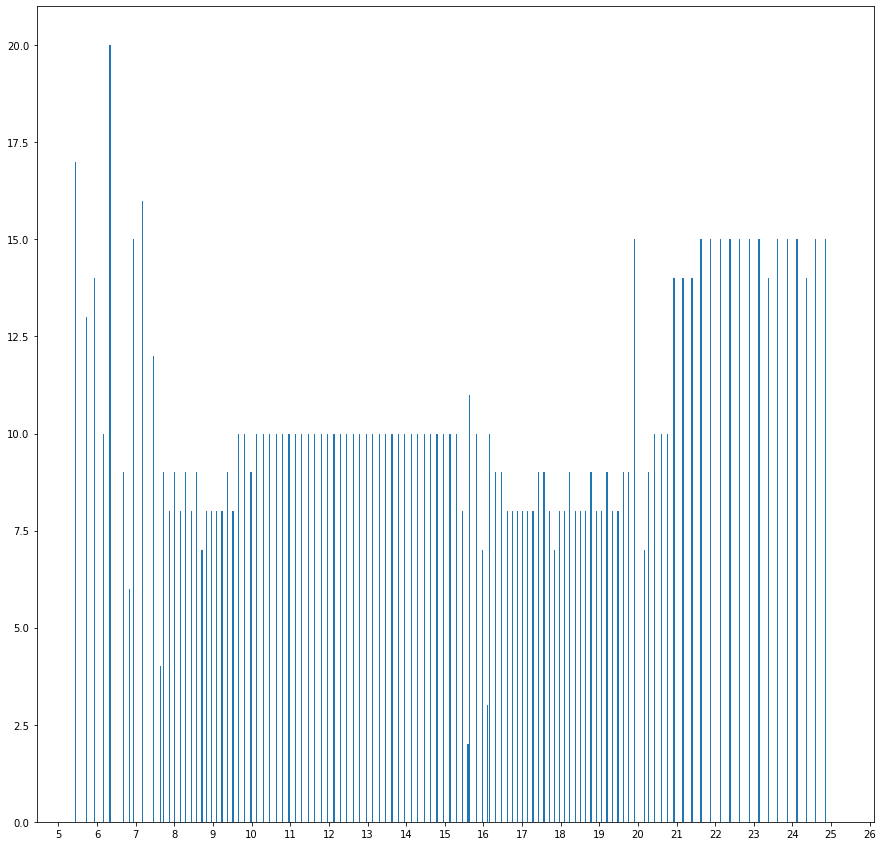

In [79]:
intervals_array = []

for i in range(len(stop_times['arrival_time'].values)):
    try:
        intervals_array.append(datetime_calculator(stop_times['arrival_time'].values[i+1],stop_times['arrival_time'].values[i]))
    except IndexError:
        intervals_array.append('00:00:00')

intervals_array = [float(intervals_array[i].split(':')[1]) for i in range(len(intervals_array))]
intervals_array

stop_times['intervals']=intervals_array

time_integer = float(stop_times['arrival_time'].values[0].split(':')[0])+float(stop_times['arrival_time'].values[0].split(':')[1])/60
time_integer = [float(stop_times['arrival_time'].values[i].split(':')[0])+float(stop_times['arrival_time'].values[i].split(':')[1])/60 for i in range(len(stop_times['arrival_time'].values))]
time_integer

stop_times['time_integer'] = time_integer

fig, ax = plt.subplots(figsize=(15,15))
                                                               
# plt.plot('time_integer', 'intervals', data=stop_times) 
plt.bar(time_integer,intervals_array,width = 0.03)

new_list = range(math.floor(min(time_integer)), math.ceil(max(time_integer))+1)
plt.xticks(new_list)                                                        

plt.show()

In [82]:
np.quantile(intervals_array,0.2)
np.quantile(intervals_array,0.8)

12.800000000000011

#https://www.tomtom.com/traffic-index/brussels-traffic
The Contractor shall observe peak hour traffic restrictions on certain streets between the hours
of 7:00 A.M. to 8:30 A.M. and 4:00 P.M. to 5:30 P.M. 

#https://www.introducingbrussels.com/metro
The frequency of the Brussels Metro depends on the time of day and the day of the week,
for example, a metro runs every 6 to 10 minutes during the peak hours. 
After peak hours, the metro runs every 20 minutes.

# Clustering:


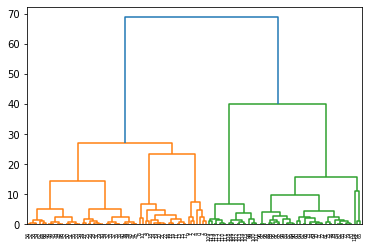

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data = list(zip(time_integer, intervals_array))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [90]:
intervals_array_1 = []

for i in range(len(stop_times['arrival_time'].values)):
    try:
        intervals_array_1.append(datetime_calculator(stop_times['arrival_time'].values[i-1],stop_times['arrival_time'].values[i]))
    except IndexError:
        intervals_array_1.append('00:00:00')

intervals_array_1 = [float(intervals_array_1[i].split(':')[1]) for i in range(len(intervals_array_1))]
intervals_array_1

[40.0,
 17.0,
 13.0,
 14.0,
 10.0,
 20.0,
 9.0,
 6.0,
 15.0,
 16.0,
 12.0,
 4.0,
 9.0,
 8.0,
 9.0,
 8.0,
 9.0,
 8.0,
 9.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 8.0,
 10.0,
 10.0,
 9.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 8.0,
 2.0,
 11.0,
 10.0,
 7.0,
 3.0,
 10.0,
 9.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 8.0,
 7.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 9.0,
 9.0,
 15.0,
 7.0,
 9.0,
 10.0,
 10.0,
 10.0,
 14.0,
 14.0,
 14.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 14.0,
 15.0,
 15.0,
 15.0,
 14.0,
 15.0,
 15.0]

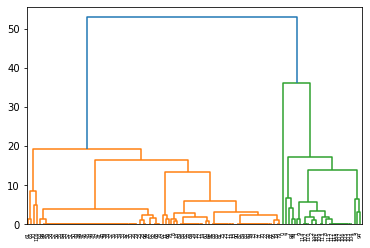

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data = list(zip(intervals_array_1, intervals_array))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()